In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [5]:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
df = pd.read_csv('sms_spam.csv', encoding='ISO-8859-1')

In [6]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# rename columns to something better
df.columns = ['labels', 'data']

# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [7]:
df.columns

Index(['labels', 'data', 'b_labels'], dtype='object')

In [8]:
count_vectorizer = CountVectorizer(decode_error='ignore')
X = count_vectorizer.fit_transform(df['data'])

In [9]:
# split up the data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

In [10]:
# create the model, train it, print scores
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.995446021966247
test score: 0.9755301794453507


In [11]:
# visualize the data 
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    print(msg)
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

In [23]:
df[df['labels'] == 'ham']['data']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
7       As per your request 'Melle Melle (Oru Minnamin...
10      I'm gonna be home soon and i don't want to tal...
13      I've been searching for the right words to tha...
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
16                             Oh k...i'm watching here:)
17      Eh u remember how 2 spell his name... Yes i di...
18      Fine if thatåÕs the way u feel. ThatåÕs the wa...
20              Is that seriously how you spell his name?
21      IÛ÷m going to try for 2 months ha ha only joking
22      So Ì_ pay first lar... Then when is da stock c...
23      Aft i finish my lunch then i go str down lor. ...
24      Ffffffffff. Alright no way I can meet up with ...
25      Just f

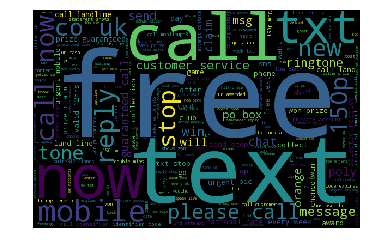

In [24]:
visualize('spam')

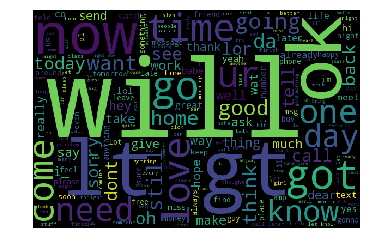

In [25]:
visualize('ham')

In [28]:
# see what we're getting wrong
df['predictions'] = model.predict(X)

# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)




FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Information call 08707808226.
Please CALL 08712402779 immediately as there is an urgent message waiting for you
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if

In [27]:
# things that should not be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

Hey company elama po mudyadhu.
Nutter. Cutter. Ctter. Cttergg. Cttargg. Ctargg. Ctagg. ie you
\Hello-/@drivby-:0quit edrunk sorry iff pthis makes no senrd-dnot no how ^ dancce 2 drum n basq!ihave fun 2nhite x ros xxxxxxx\""
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Audrie lousy autocorrect
Waqt se pehle or naseeb se zyada kisi ko kuch nahi milta,Zindgi wo nahi he jo hum sochte hai Zindgi wo hai jo ham jeetey hai..........
wiskey Brandy Rum Gin Beer Vodka Scotch Shampain Wine \KUDI\"yarasu dhina vaazhthukkal. .."
Madam,regret disturbance.might receive a reference check from DLF Premarica.kindly be informed.Rgds,Rakhesh,Kerala.
\NONE!NOWHERE IKNO DOESDISCOUNT!SHITINNIT\""
staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just 